# Final Project

## Option
- `option (a)` - perform an analysis of lyrics of popular music

## Topic
- Profiling the progression of the music/lyrics of a musician (change over time)

The deliveries of your project include:

- Paper (information is in the end of this document)
- Code
- features_pca files (csv format, when not downloaded from Canavs)

For convenience, a different entry in Canvas for each delivery will be created, but only the paper entry will be gradable.

Each project needs to include at least two of the following:
- Classification
- Regression
- Unsupervised learning

---

# Steps
## Preprocess
1. Clean features_pca set by shifting two rows with had offset values to the left, and delete the last column.
    - print(data.isnull().sum())
2. Drop 'Path' and 'Class' columns for analysis

## Imports

In [15]:
# Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from numpy import nan

import matplotlib.pyplot as plt

# Preprocess

In [16]:
# Load and preprocess data
data = pd.read_csv('./LedZeppelin.csv')

features = data.drop(['Path', 'Class'], axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Unsupervised learning

In [17]:
# Unsupervised Learning
# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Dimensionality Reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

## Visualization

### PCA Visualization (Clustering and Dimensionality Reduction):
Visualizing the PCA-reduced features helps understand how songs cluster in two-dimensional space. You can color-code points by:

Albums (to see how songs group by album).
Years (to observe temporal progression).

In [18]:
import matplotlib.pyplot as plt

# PCA scatter plot
plt.figure(figsize=(12, 8))
for album in data['Album'].unique():
    subset = features_pca[data['Album'] == album]
    plt.scatter(subset[:, 0], subset[:, 1], label=album, alpha=0.6)

plt.title("PCA Visualization of Song Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


KeyError: 'Album'

<Figure size 1200x800 with 0 Axes>

### Clustering Results:
Overlay clustering results on PCA visualization to see if clusters align with albums or years.

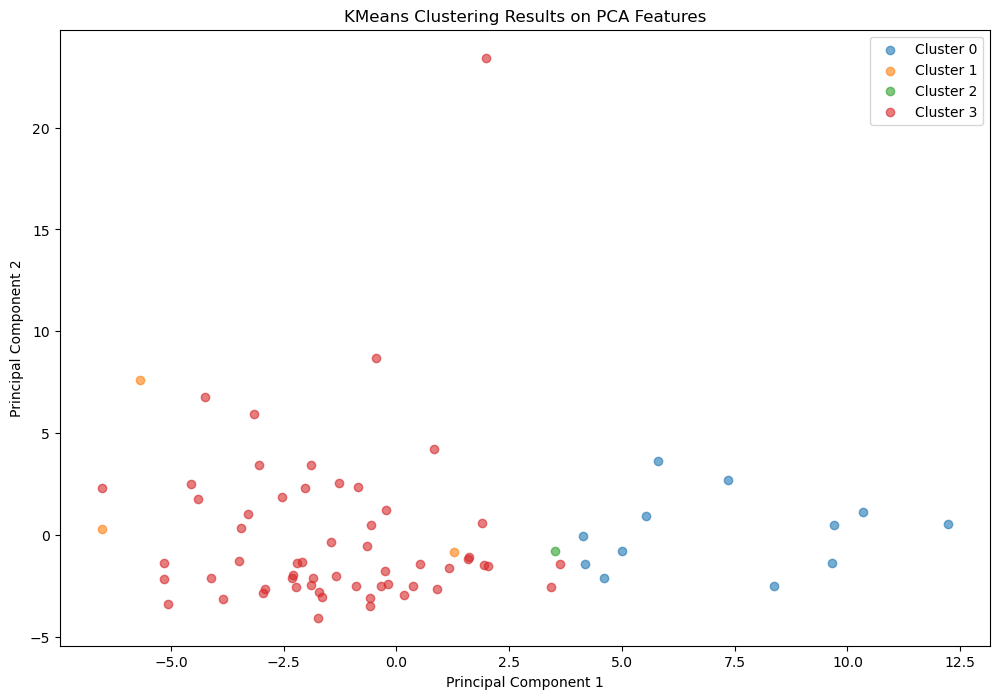

In [ ]:
# Add cluster labels to the dataset
data['Cluster'] = clusters

# Cluster scatter plot
plt.figure(figsize=(12, 8))
for cluster in range(kmeans.n_clusters):
    subset = features_pca[data['Cluster'] == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title("KMeans Clustering Results on PCA Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Clustering Over Time:
Visualize how clusters evolve across years by using a line plot or heatmap.

In [ ]:
# Aggregate clusters by year
clusters_by_year = data.groupby(['Year', 'Cluster']).size().unstack(fill_value=0)

# Heatmap of clusters over time
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(clusters_by_year, cmap='viridis', annot=True, fmt='d')
plt.title("Cluster Membership Over Time")
plt.xlabel("Cluster")
plt.ylabel("Year")
plt.show()

KeyError: 'Year'

# Regression

In [19]:
# Regression
data['Year'] = data['Class'].str.extract(r'-(\d{4})')  # Extract year if present
data['Year'] = data['Year'].fillna(nan)  # Fill missing years with NaN (or choose a placeholder)
data['Year'] = data['Year'].astype('Int64')  # Use nullable integer type for NaNs
# Use imputation to fill rows with NA with the average year
data['Year'] = data['Year'].fillna(data['Year'].median())  # Replace NaN with the mean

reg_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(features_scaled, data['Year'], test_size=0.2, random_state=42)
reg_model.fit(x_train, y_train)

predicted_years = reg_model.predict(x_test)
mae = mean_absolute_error(y_test, predicted_years)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.460740581490957


## Visualization

### Predicted vs. Actual Years:
Compare the predicted years against the actual years to evaluate regression performance visually.

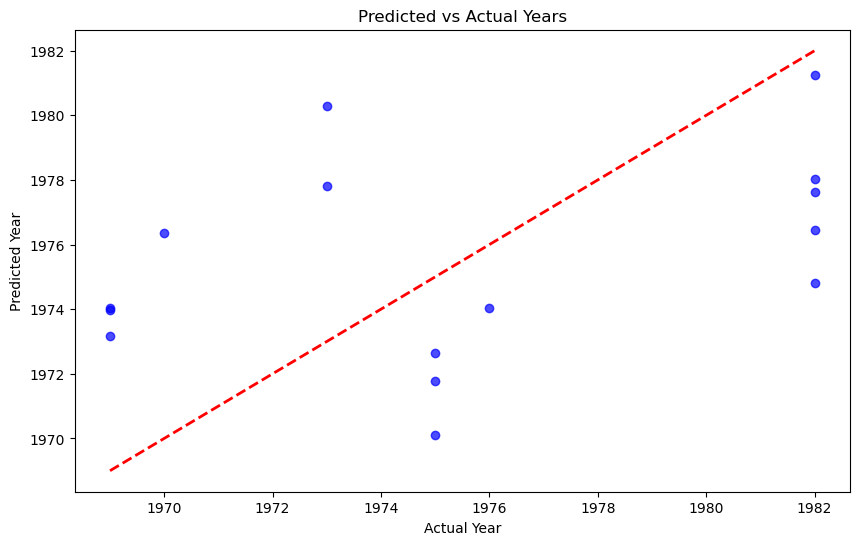

In [20]:
# Regression scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_years, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title("Predicted vs Actual Years")
plt.xlabel("Actual Year")
plt.ylabel("Predicted Year")
plt.show()

# Classification

In [21]:
# Classification
# Extract album names
data['Album'] = data['Class'].str.split('-').str[0]

# Use Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(features_scaled, data['Album'], test_size=0.2, random_state=42)
rf_classifier.fit(x_train, y_train)
predicted_albums = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, predicted_albums)
print(f'Classification Accuracy: {accuracy:.2f}')


Classification Accuracy: 0.20



## Visualization

### Confusion Matrix:
Use a confusion matrix to see which albums are frequently misclassified.

<Figure size 1200x1000 with 0 Axes>

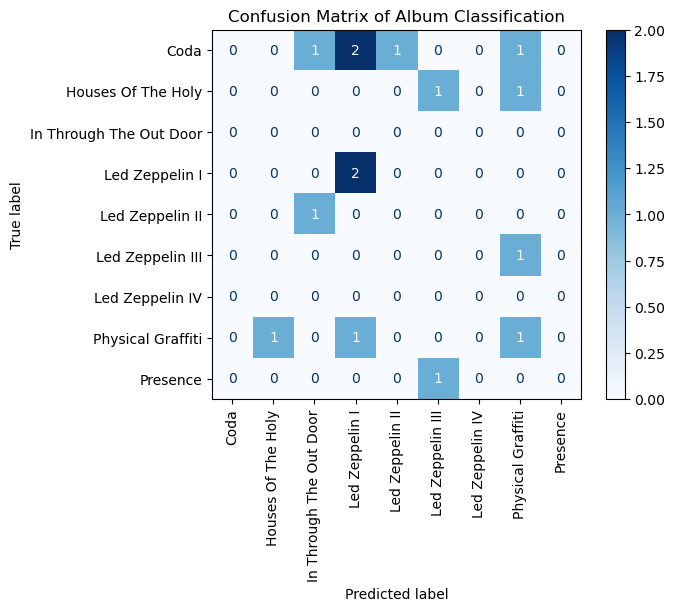

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_albums, labels=data['Album'].unique())

# Display confusion matrix
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data['Album'].unique())
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix of Album Classification")
plt.show()